<center>
    <h1>Geospatial Data Science Tutorial for IC2S2'23: OpenStreetMap</h1>
</center>

<p style="text-align:center;">
<img src="files/osm_logo.jpeg" alt="OSM logo" width=200px>
</p>

This notebook will give you a general, but brief, introduction to what OpenStreetmap is, what the OpenStreetMap data model looks like, and how OpenStreetMap data can be accessed.

The notebook was adapted from:

* OSMnx examples: https://github.com/gboeing/osmnx-examples

*All data in this notebook: © OpenStreetMap contributors*
## Getting to know OpenStreetMap

[OpenStreetMap](https://www.openstreetmap.org) (OSM) is an open data and mapping platform with global coverage 🌍. Some people compare it to Google Maps, but unlike Google Maps, OSM is open-source and allows you to edit, download and access all data for free.

OSM was established in 2004 by Steve Coast, and is an example of what we call Volunteered geographical information (VGI). This means that the backbone of OSM is the contributions of volunteer contributors. So far, more than [10 million people](https://wiki.openstreetmap.org/wiki/Contributors) have contributed to OSM.

OSM is both an immensely important resource for research using data on the built environment, but is also used by [many companies](https://welcome.openstreetmap.org/about-osm-community/consumers/). 

OSM is an open mapping platform, and you will therefore encounter local variations in mapping practices and varying data quality, depending on the location (like many other data set), but research has time and time again shown that OSM data generally is of a high quality and comparable to official data sets ([Neis et al. 2012](https://www.mdpi.com/1999-5903/4/1/1); [Zielstra and Hochmair 2012](https://journals.sagepub.com/doi/10.3141/2299-05); [Hochmair et al. 2015](https://onlinelibrary.wiley.com/doi/10.1111/tgis.12081); [Ferster et al. 2020](https://www.tandfonline.com/doi/full/10.1080/15568318.2018.1519746); [Zhang et al. 2021](https://www.sciencedirect.com/science/article/pii/S092427162100085X)).


<p style="text-align:center;">
<img src="files/completeness.png" alt="Map showing the completeness of OSM data on a global scale" width=600px>
</p>

<p style="text-align:center;">
<i>Global OSM road data completeness<a href="https://alga.win.tue.nl/tutorials/openstreetmap/">(Barrington-Leigh & Millard-Ball 2019)</a></i></p>


In our research group, we use OSM data for many of our research projects:

* [Growing urban bicycle networks](https://www.nature.com/articles/s41598-022-10783-y)

* [Automated Detection of Missing Links in Bicycle Networks](https://onlinelibrary.wiley.com/doi/10.1111/gean.12324)

* [BikeDNA: Bicycle Infrastructure Data & Network Assessment](https://github.com/anerv/BikeDNA)

<p style="text-align:center;">
<img src="files/research_illu.png" alt="Illustrations of research projects" width=500px>
</p>


## OSM data model

All OSM data consist of 3 key elements, which are used to map all types of objects:

* *Nodes*
* *Ways*
* *Relations*

Example of OSM data model: Streets are mapped using **ways** (lines) and **nodes** (points) at intersections. Polygons are mapped using **closed ways** and more complex objects are mapped using **relations** which connect multiple ways and nodes.

<p style="text-align:center;">
<img src="files/nodes-and-ways.svg" alt="Illustration of OSM data model" width=400px>
</p>

<p style="text-align:center;">
<i><a href="https://alga.win.tue.nl/tutorials/openstreetmap/">Illustration from TU Eindhoven</a></i></p>

To add further information about objects, OSM uses **tags**. The many different tags can take a while to get used to, but this is a great resource: https://wiki.openstreetmap.org/wiki/Map_features

For street networks, a tag could for example be `highway:residential` for a residential street, or `highway:cycleway` for a bike lane.

## Accessing OSM data

There are many ways to access OSM data, but today, we will focus on how to download OSM data using the Python library [**OSMnx**](https://osmnx.readthedocs.io/en/stable/) from Geoff Boeing.

When we use OSMnx to download OSM data, all geometries are converted into [Shapely geometries](https://shapely.readthedocs.io/en/stable/geometry.html) as either Points, LineStrings or Polygons.

To use OSMnx we need to define which area we want to download data for. There are many ways of doing this, such as providing a bounding box, a polygon defining the area, an address, a place name, etc. Below we will see a few different examples for getting data on **administrative areas, building footprints, points of interest**, and **street networks**.


> **NOTE**
>
> OSMnx is great for smaller areas - to process OSM data in Python for areas we recommend using [Pyrosm](https://pyrosm.readthedocs.io/en/latest/index.html) by Henrikki Tenkanen.
>
>To download data for larger areas directly, use for example [Geofabrik](http://download.geofabrik.de/) or [BBBike](https://download.bbbike.org/osm/).
>

In [49]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as cx
import networkx as nx


### Place boundaries

OSM contain a large number of place boundaries. To download e.g. the place boundary for a municipality or city, we can use `geocode_to_gdf()`. The function uses the geocoder [Nominatim](https://nominatim.org/) to search the OSM data, so the search string must match the names in OSM/Nominatim.

You can check the correct search string like this: https://nominatim.openstreetmap.org/ui/search.html?q=Copenhagen+municipality


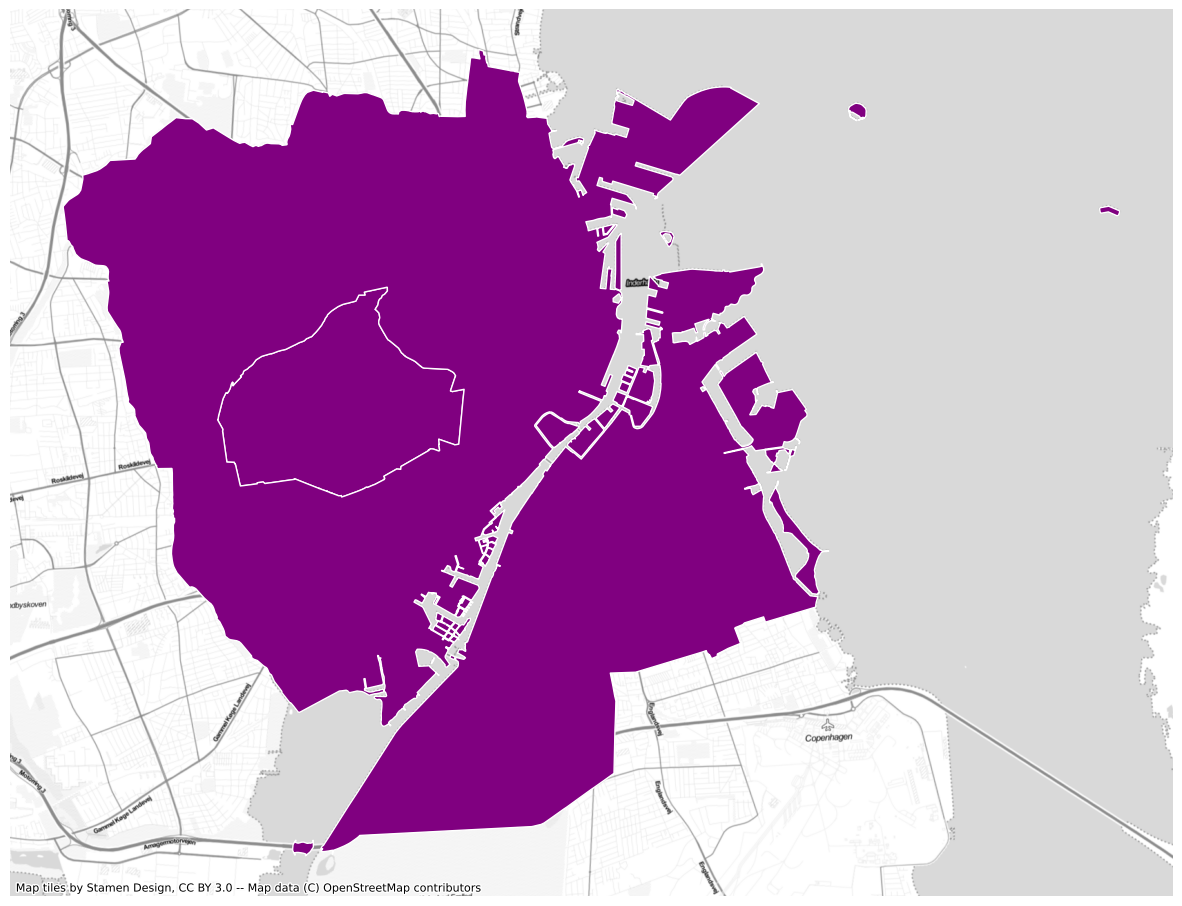

In [3]:
# get boundary polygons for several areas, project to local CRS, and plot
place_names = [
    "Frederiksberg Municipality",
    "Copenhagen Municipality",
]
cph = ox.geocode_to_gdf(place_names) # get place boundaries
cph = ox.project_gdf(cph,"EPSG:25832") # project to local crs
ax = cph.plot(fc="purple", ec="white",figsize=(15,15))
ax.axis("off")
cx.add_basemap(
    ax=ax, 
    crs="EPSG:25832", 
    source=cx.providers.Stamen.TonerLite);


### Building footprints

OSM is, in most places, a great resource for data on the built environment. 

To download data on buildings we use `geometries_from_place()` with the search query `"building":True` and plot them with `plot_footprints()`.

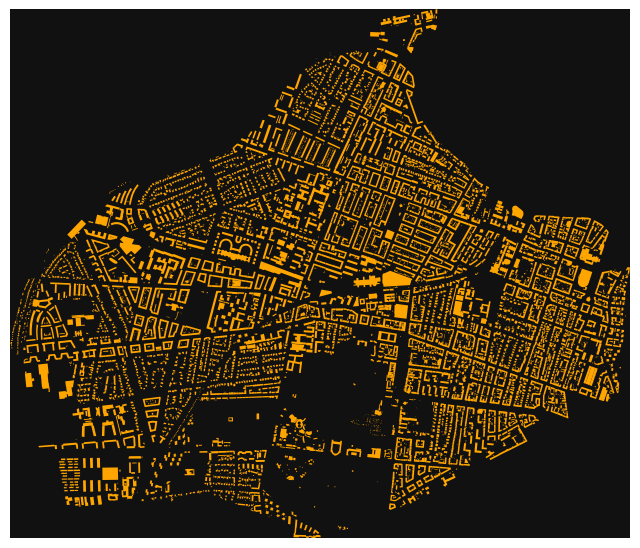

In [4]:
gdf = ox.geometries_from_place("Frederiksberg Municipality", tags = {"building": True}) # get all osm geometries with the tag 'building':True
gdf_proj = ox.project_gdf(gdf, to_crs="EPSG:25832") # project to local crs
fig, ax = ox.plot_footprints(gdf_proj, dpi=400, save=False, show=True, close=True)

### Points of interest

OSM contain a large number of destinations, amenities and other types of 'points of interests' (POIs), which - mostly - are mapped as point geometries. To get a specific type of POI in e.g. Copenhagen, we can use `geometries_from_place()` combined with a tag dictionary, which is used to query the OSM data with.

In the example below we download all shops which have been tagged as 'bakery' in Copenhagen.

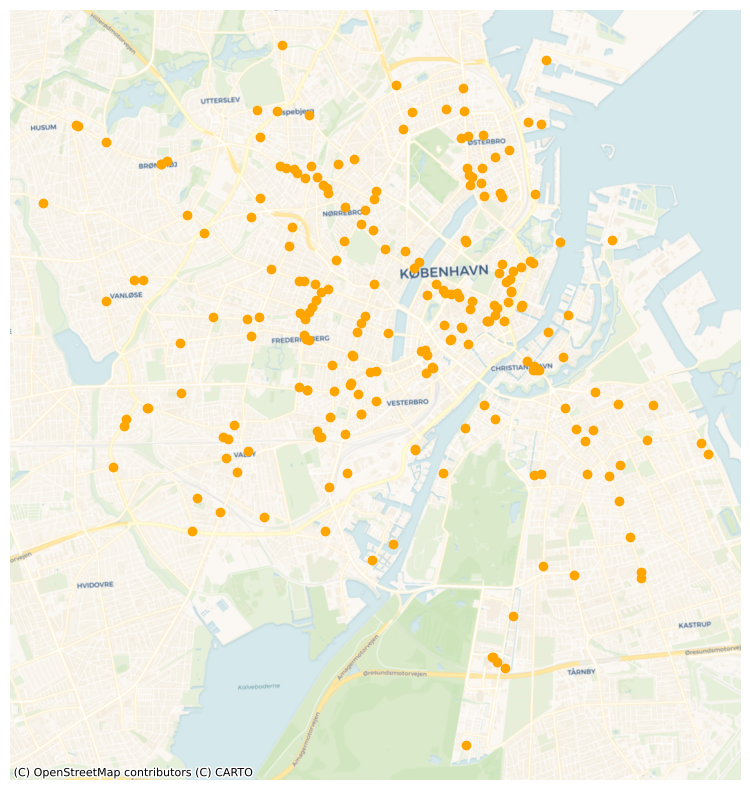

In [5]:
tags = {"shop": "bakery"} # define tags used to query OSM
bakeries = ox.geometries_from_place(["Copenhagen Municipality", "Frederiksberg Municipality"], tags) # download objects that matches query within specific location

fig, ax = plt.subplots(figsize=(10,10))

bakeries.to_crs("EPSG:25832").plot(ax=ax, color='orange') # plot to local crs
ax.set_axis_off()
cx.add_basemap(
    ax=ax, 
    crs="EPSG:25832", 
    source=cx.providers.CartoDB.Voyager);

### Street networks

Street networks is one of the more common types of spatial networks. We will look into spatial networks in more detail in the last section of the tutorial, but for now, let's see how we can download street network data with OSMnx.

As we have just seen, OSMnx works great for getting both place boundaries, building footprints and POIs, but the Python package is tailored towards downloading and working with OSM data on street networks.

There are several different ways of defining which area we want data for. In the first example, we use `graph_from_point()` to get the network centered around a specific location, defined by a coordinate pair (the website [epsg.io](https://epsg.io/) is a great resource for finding the coordinates of an address in different coordinate reference systems).

We use the parameters `dist` to define the search window around our point, set `dist_type = network` to use the distance in network length (compared to a straight "as the crow flies" distance), and `network_type = walk` to only include the part of the street network where walking is allowed:

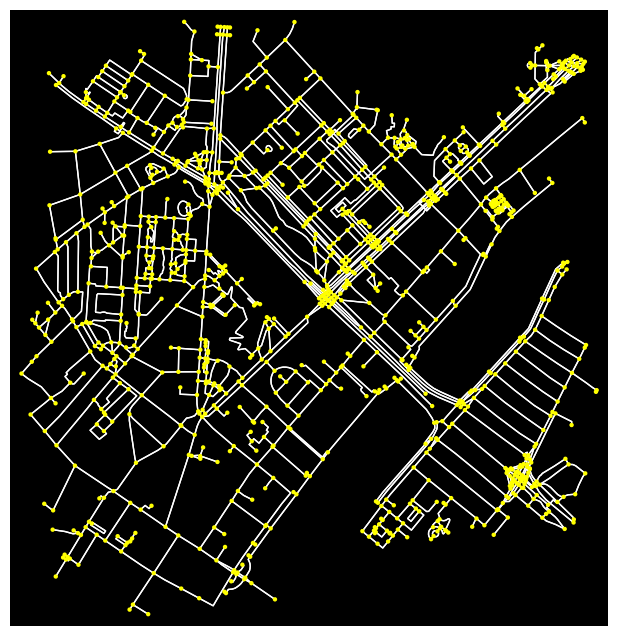

In [21]:
location_point = (55.693282, 12.565123) # The coordinates of the conference building in the CRS used by OSM (EPSG:4326). Notice that the coordinates must be passed as lat, long (y,x)

G1 = ox.graph_from_point(location_point, dist=1000, dist_type="network", network_type="walk") # Get graph within 1000 walking network distance of the conference building
ox.plot_graph(G1, node_color="yellow",bgcolor="black",edge_color="white", node_size=10);


The map above shows the network edges (OSM ways) in white and the nodes in yellow.

We can also use for example `graph_from_address()`, here using the address of the building (but remember that the address must follow the format used in OSM/Nominatim to work!)

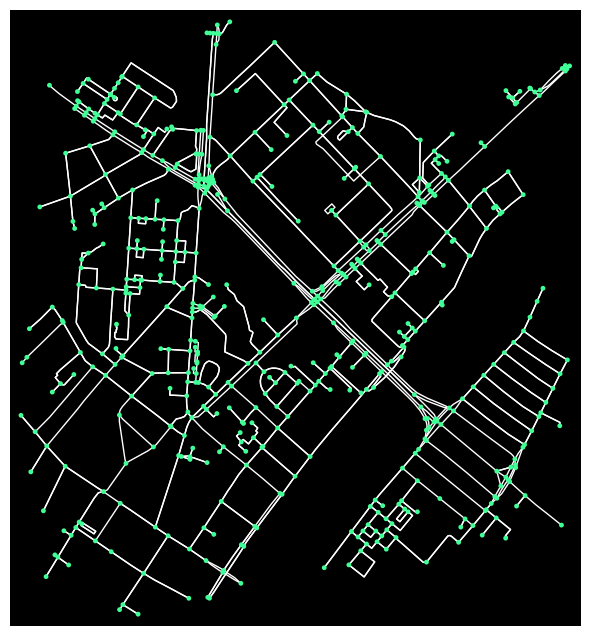

In [24]:
# network from address, including only nodes within 1km along the network from the address
G_bike = ox.graph_from_address(
    address="3 Blegdamsvej, Copenhagen",
    dist=1000,
    dist_type="network",
    network_type="bike", # this time getting all streets and paths where biking is allowed
)

ox.plot_graph(G_bike, node_color="#3fff96",bgcolor="black",edge_color="white", node_size=12);


We can also highlight parts of the network with specific properties, such as the map below showing all streets/lanes in red:

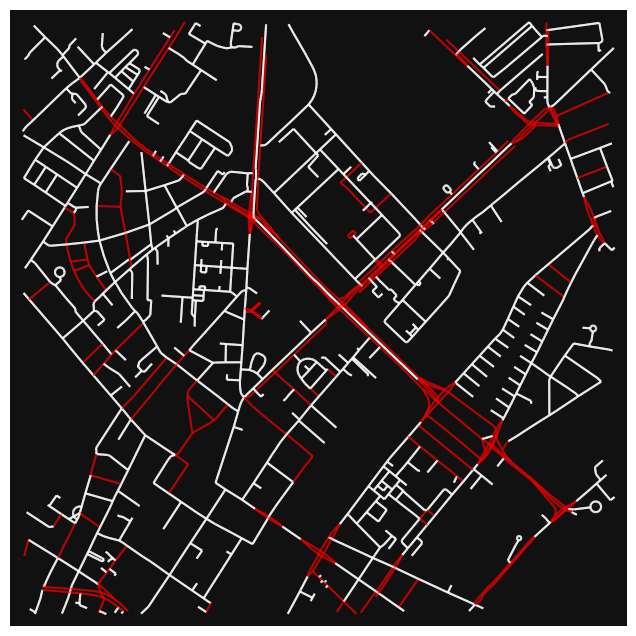

In [53]:
G = ox.graph_from_point(location_point, network_type="drive_service", dist=1000, simplify=False) 

ec = ["r" if data["oneway"] else "w" for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7)

Be aware that streets made up of two (minimally separated) lanes could have their lanes marked as "oneway", but effectively the street is two-way! 

<p style="text-align:left;">
<img src="files/roskildevej.jpg" alt="Illustrations of research projects" width=600px>
</p>

> **TIP**
>
> If you prefer working with your data as GeoDataFrames rather than as network objects, you can easily turn an OSMnx network into > dataframes like this:
>
> `nodes, edges = ox.graph_to_gdfs(G)`
>
> ... this will give you 2 GeoDataFrames, one with the network nodes as points and one with the edges as LineStrings.

#### Custom filtering

If we want more control with what type of data our networks include, we need to get into custom filtering of the OSM data.

For simple queries, we can use the `custom_filter` parameter to, for example, get the metro network in Copenhagen:

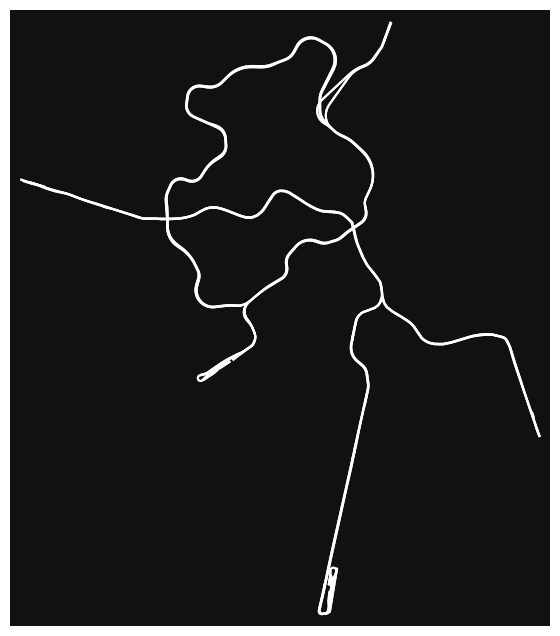

In [48]:
# get CPH metro network.
ox.settings.useful_tags_way += ["railway"] # first we need to add the railway tag as a 'useful tag' to be included by OSMnx
G = ox.graph_from_place(
    ["Copenhagen Municipality, Denmark","Frederiksberg Municipality, Denmark"], # both municipalities in CPH
    retain_all=True, # Keep all components, not just the largest one
    truncate_by_edge=False,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=1.5);

If we only want a network with dedicated bicycle infrastructure, rather than everywhere where cycling is allowed, we need to use slightly more advanced methods. One option is to iterate over a dictionary of different filters and in the end use `NetworkX` to combine the results into one single network:

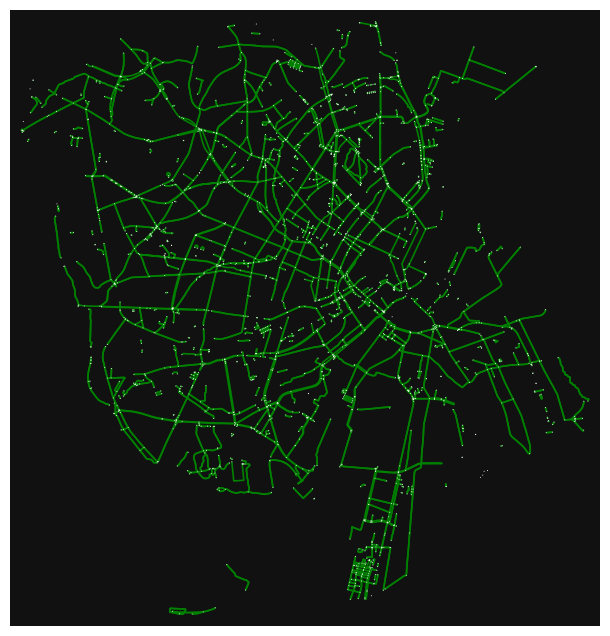

In [54]:
place = ["Copenhagen Municipality, Denmark","Frederiksberg Municipality, Denmark"]

# custom filter for all cycling infrastructure
cf_bike = {'bike_cyclewaytrack': '["cycleway"~"track|lane|opposite_lane|opposite_track|designated"]',
            'bike_highwaycycleway': '["highway"~"cycleway"]',
            'bike_cyclewayrighttrack': '["cycleway:right"~"track|lane|opposite_lane|opposite_track|designated"]',
            'bike_cyclewaylefttrack': '["cycleway:left"~"track|lane|opposite_lane|opposite_track|designated"]',
            'bike_cyclestreet': '["cyclestreet"]',
            'bike_bicycleroad': '["bicycle_road"]',
            'bike_livingstreet': '["highway"~"living_street"]'
            } 

bike_graphs = []

for graph_type, cf in cf_bike.items():
    try:
        G_bike =  ox.graph_from_place(place, network_type='all', retain_all=True, custom_filter=cf)
        bike_graphs.append(G_bike)
    except ValueError:
        continue

G_bike = nx.compose_all(bike_graphs)

ox.plot_graph(G_bike, node_size=0.5, edge_color="green", edge_linewidth=1.2);


### DIY

Try downloading OSM data for your home city. You could for example find the street network around your work place, plot all the [schools](https://wiki.openstreetmap.org/wiki/Tag:amenity%3Dschool) or the [rail network](https://wiki.openstreetmap.org/wiki/Key:railway), or have a look at some of the [many other examples](https://github.com/gboeing/osmnx-examples/tree/main/notebooks)

In [5]:
# ADD YOUR CODE HERE

## Further resources

Would you like to learn more about working with and contributing to OSM?

* [Become an OSM contributor yourself!](https://wiki.openstreetmap.org/wiki/How_to_contribute)
* [Check out the OSM wiki](https://wiki.openstreetmap.org/wiki/Main_Page)

* Listen to this [podcast on the OSM history & community](https://mapscaping.com/podcast/openstreetmap-is-a-community-of-communities/)

* Check out some of these projects using OSM data:
    * [A/B Street](https://play.abstreet.org/0.3.44/abstreet.html)
    * [Propensity to Cycle Tool](https://www.pct.bike/)
    * [AccessMap](https://www.accessmap.io/?region=wa.seattle&lon=-122.338&lat=47.607&z=14.5)
    * [prettymaps](https://github.com/marceloprates/prettymaps)
    
<br>

* ...or have a look at some of the many research projects based on OSM:

    * [A Multi-Scale Analysis of 27,000 Urban Street Networks: Every US City, Town, Urbanized Area, and Zillow Neighborhood (Boeing 2020)](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=xaKBPQQAAAAJ&citation_for_view=xaKBPQQAAAAJ:Wp0gIr-vW9MC)
    * [GrowBike (Szell et al 2022)](https://growbike.net/)
    * [Fixbike (Vybornova et al 2022)](https://fixbike.net/)
